In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('diabetes_prediction.csv')

In [2]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [5]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


In [6]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [7]:
df[df.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: >

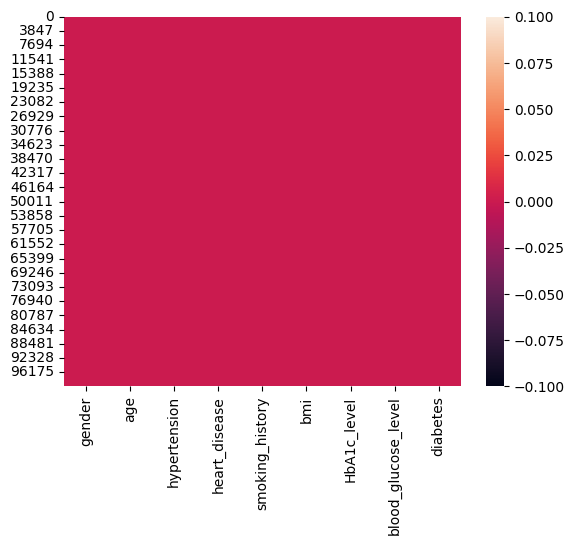

In [9]:
sns.heatmap(df.isnull())

<h4><p>Demographic Analysis:

Distribution of Age:
To analyze the age distribution, you can plot a histogram or a boxplot to visualize the spread and central tendency of the age data.</p></h4>

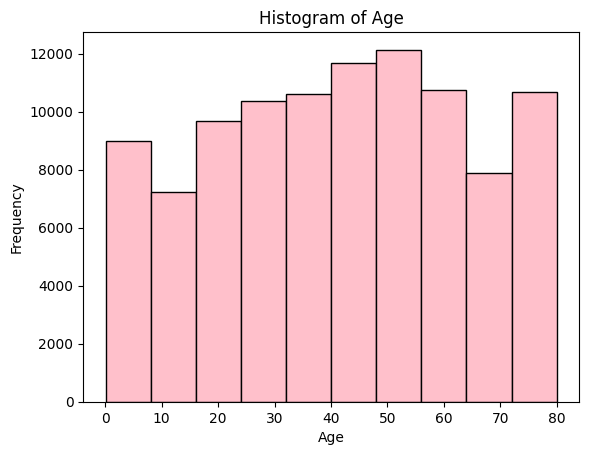

In [7]:

age_data = df['age']

# Create histogram
plt.hist(age_data, bins=10, color='pink', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

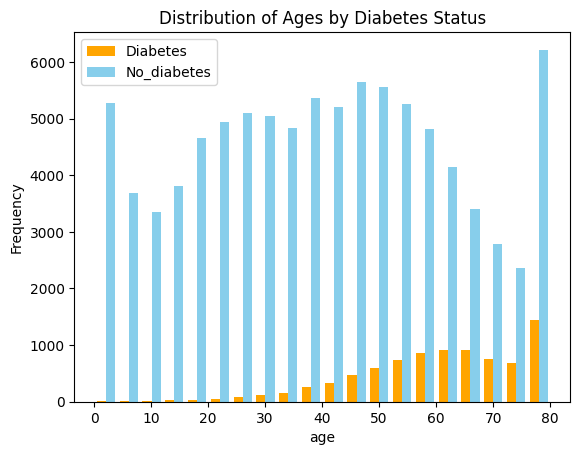

In [11]:
diabetes_age_data =df[['age','diabetes']]
diabetes_yes =diabetes_age_data[diabetes_age_data['diabetes']==1]['age']
diabetes_no =diabetes_age_data[diabetes_age_data['diabetes']==0]['age']
plt.hist([diabetes_yes, diabetes_no],bins = 20,color=['orange', 'skyblue'],label=['Diabetes','No_diabetes'])
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages by Diabetes Status')
plt.legend()
plt.show()                                                     

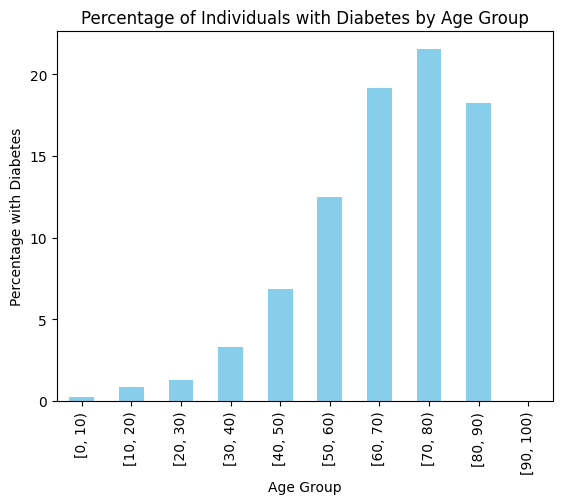

In [12]:
diabetes_age_data = df[['diabetes', 'age']]

# Calculate percentage of individuals with diabetes within each age group
age_groups = pd.cut(diabetes_age_data['age'], bins=range(0, 101, 10), right=False)
percentage_diabetes = diabetes_age_data.groupby(age_groups)['diabetes'].mean() * 100

# Plot the percentage chart
percentage_diabetes.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Percentage with Diabetes')
plt.title('Percentage of Individuals with Diabetes by Age Group')

# Show plot
plt.show()

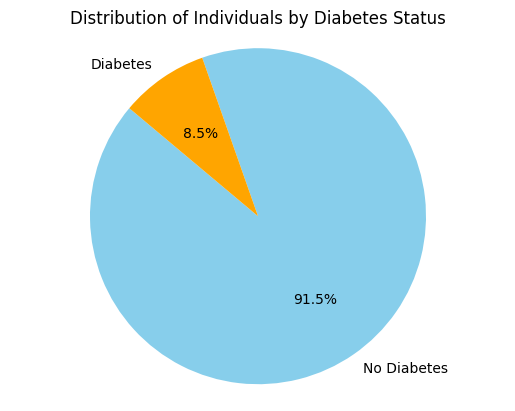

In [13]:
diabetes_data = df['diabetes'].value_counts()

# Plot the pie chart
plt.pie(diabetes_data, labels=['No Diabetes', 'Diabetes'], colors=['skyblue', 'orange'], autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Distribution of Individuals by Diabetes Status')

# Show plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [14]:
data_corelation = df[['age','blood_glucose_level','diabetes']]
corelation_matrix =data_corelation.corr()
print(corelation_matrix)

                          age  blood_glucose_level  diabetes
age                  1.000000             0.110672  0.258008
blood_glucose_level  0.110672             1.000000  0.419558
diabetes             0.258008             0.419558  1.000000


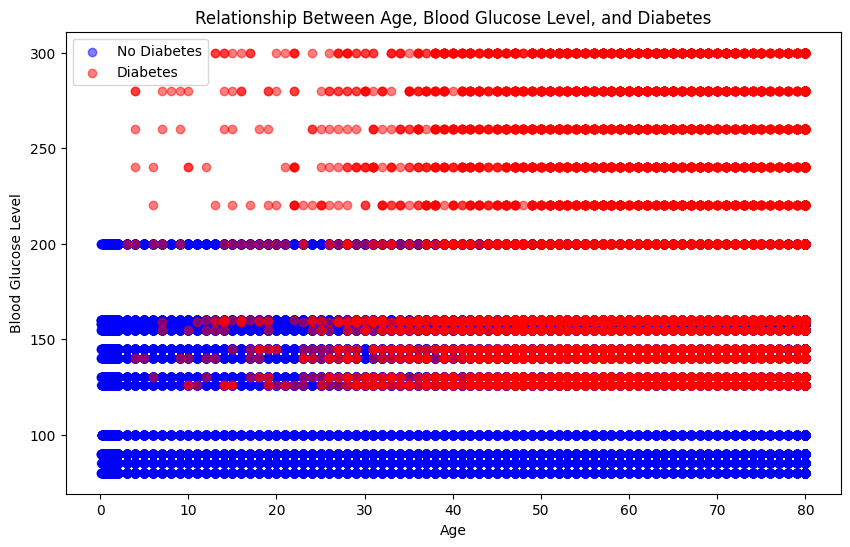

In [15]:
data_subset = df[['age', 'blood_glucose_level', 'diabetes']]

# Separate data for individuals with and without diabetes
diabetes_yes = data_subset[data_subset['diabetes'] == 1]
diabetes_no = data_subset[data_subset['diabetes'] == 0]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(diabetes_no['age'], diabetes_no['blood_glucose_level'], color='blue', label='No Diabetes', alpha=0.5)
plt.scatter(diabetes_yes['age'], diabetes_yes['blood_glucose_level'], color='red', label='Diabetes', alpha=0.5)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')
plt.title('Relationship Between Age, Blood Glucose Level, and Diabetes')
plt.legend()

# Show plot
plt.show()

In [25]:
df.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


<Axes: xlabel='gender', ylabel='count'>

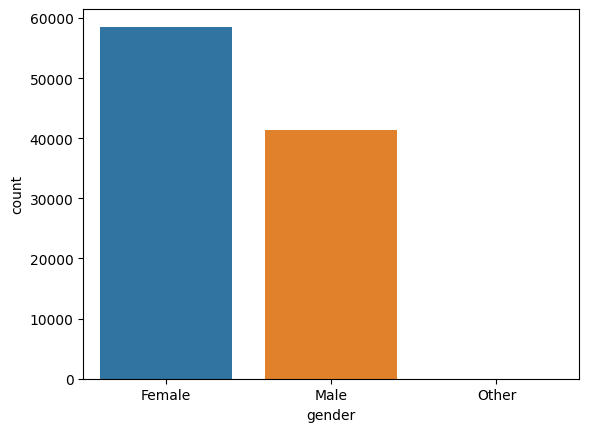

In [19]:
count_gender = df.groupby('gender').gender.value_counts()
print(count_gender)
sns.countplot(x ='gender',data=df,order=count_gender.index)

0    91500
1     8500
Name: diabetes, dtype: int64


<Axes: xlabel='diabetes', ylabel='count'>

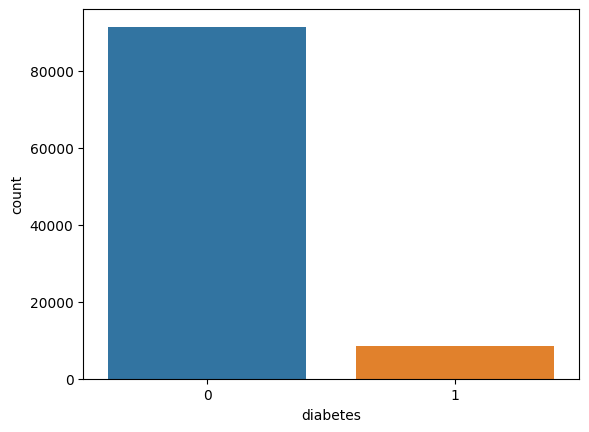

In [23]:
# count_diabetes = df.groupby('diabetes').diabetes.value_counts()
# print(count_diabetes)
# sns.countplot(x ='diabetes',data=df,order=count_diabetes.index)

count_diabetes = df['diabetes'].value_counts()

# Print the count of each class
print(count_diabetes)

# Create count plot
sns.countplot(x='diabetes', data=df)

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64


<Axes: xlabel='smoking_history', ylabel='count'>

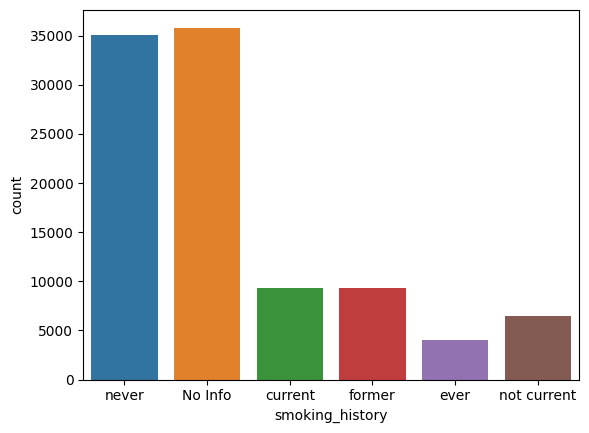

In [25]:
count_smoker = df['smoking_history'].value_counts()

# Print the count of each class
print(count_smoker)

# Create count plot
sns.countplot(x='smoking_history', data=df)

In [16]:
result = df[(df['HbA1c_level'] ==7.0) & (df['blood_glucose_level']>100)&(df['diabetes'] ==1)]
print(result)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
53     Female  53.0             0              0          former  27.32   
142    Female  80.0             0              0          former  21.97   
293    Female  48.0             0              0           never  20.19   
471      Male  37.0             0              0           never  37.24   
518    Female  67.0             0              0          former  32.31   
...       ...   ...           ...            ...             ...    ...   
99271    Male  56.0             1              1         No Info  31.40   
99463    Male  38.0             0              0            ever  28.38   
99678  Female  50.0             0              1           never  26.32   
99739  Female  65.0             1              0           never  35.00   
99962  Female  58.0             1              0           never  38.31   

       HbA1c_level  blood_glucose_level  diabetes  
53             7.0                  159        

In [17]:
df[df['hypertension']==1]['age'].mean()

61.7690046760187

# Descriptive Analysis


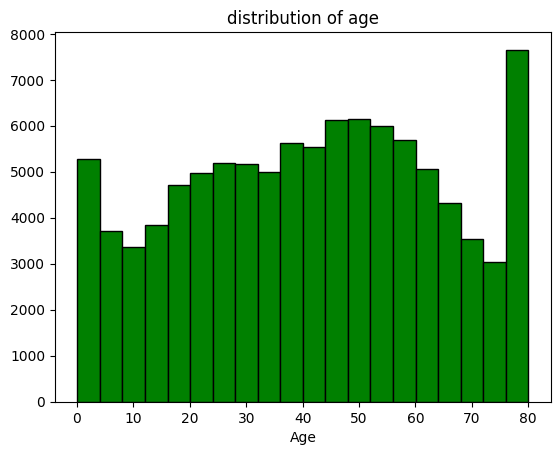

In [21]:
# What is the distribution of age in the dataset?
age_data =df['age']
plt.hist(age_data, bins=20,color='green',edgecolor='black',label='age')
plt.xlabel('Age')
plt.title('distribution of age')
plt.show()


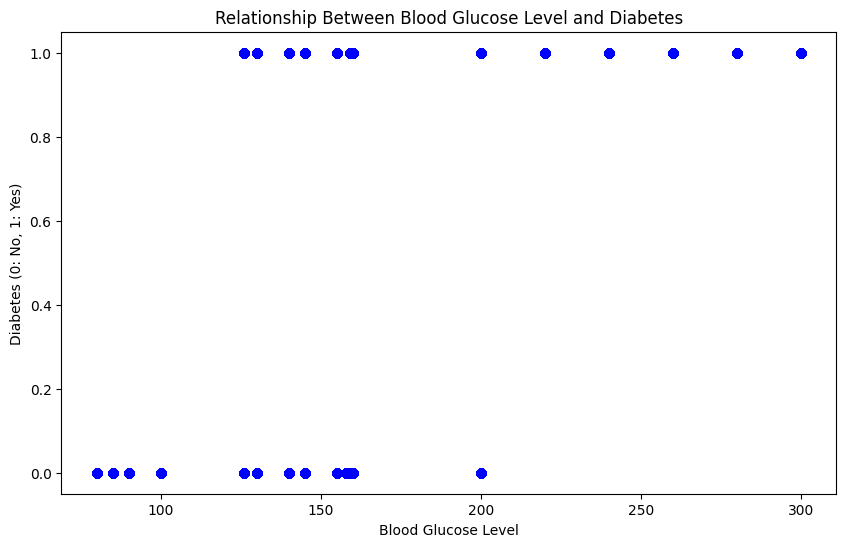

In [26]:
blood_glucose_level = df['blood_glucose_level']
diabetes = df['diabetes']

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(blood_glucose_level, diabetes, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Blood Glucose Level')
plt.ylabel('Diabetes (0: No, 1: Yes)')
plt.title('Relationship Between Blood Glucose Level and Diabetes')

# Show plot
plt.show()

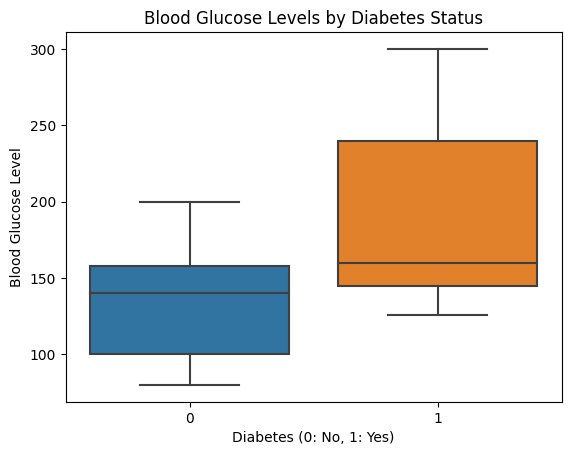

In [27]:
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)

# Add labels and title
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Blood Glucose Level')
plt.title('Blood Glucose Levels by Diabetes Status')

# Show plot
plt.show()